In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [3]:
project_path = '/content/drive/My Drive/GL/Capstone_Project/'

In [4]:
import numpy as np
import pandas as pd

Loading data

In [5]:
data = pd.read_excel(project_path+'input_data - Copy.xlsx')

In [6]:
data.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [7]:
data.shape

(8500, 4)

Checking for Missing fields

In [8]:
data.isna().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [9]:
data[data['Short description'].isna()==True]

,Short description,Description,Caller,Assignment group
2604,NaN,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,ohdrnswl rezuibdt,GRP_34
3383,NaN,\r\n-connected to the user system using teamvi...,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn.\r\n-connected to...,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn.\r\n-connected to...,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn.\r\n-connected to...,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn.\r\n-connected to...,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,wvqgbdhm fwchqjor,GRP_0
4341,NaN,\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...,eqmuniov ehxkcbgj,GRP_0


In [10]:
data[data['Description'].isna()==True]

,Short description,Description,Caller,Assignment group
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


Replacing NaN with space chanacter

In [11]:
data = data.fillna(value=' ')

In [12]:
data.isna().sum()

Short description    0
Description          0
Caller               0
Assignment group     0
dtype: int64

Creating new column 'final_description' to merge both short and long description

In [13]:
data['final_description'] = data['Description']

In [14]:
data.head()

,Short description,Description,Caller,Assignment group,final_description
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,-verified user details.(employee# & manager na...
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error


In [15]:
for i in range(data.shape[0]):
  if data['Short description'][i] == data['Description'][i]:
    data['final_description'][i] = data['Description'][i]
  else:
    data['final_description'][i] = data['Short description'][i] + ' ' + data['Description'][i]

In [16]:
data.head()

,Short description,Description,Caller,Assignment group,final_description
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error


Exploring Target class

In [17]:
data['Assignment group'].value_counts()

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
          ... 
GRP_70       1
GRP_61       1
GRP_73       1
GRP_64       1
GRP_35       1
Name: Assignment group, Length: 74, dtype: int64

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


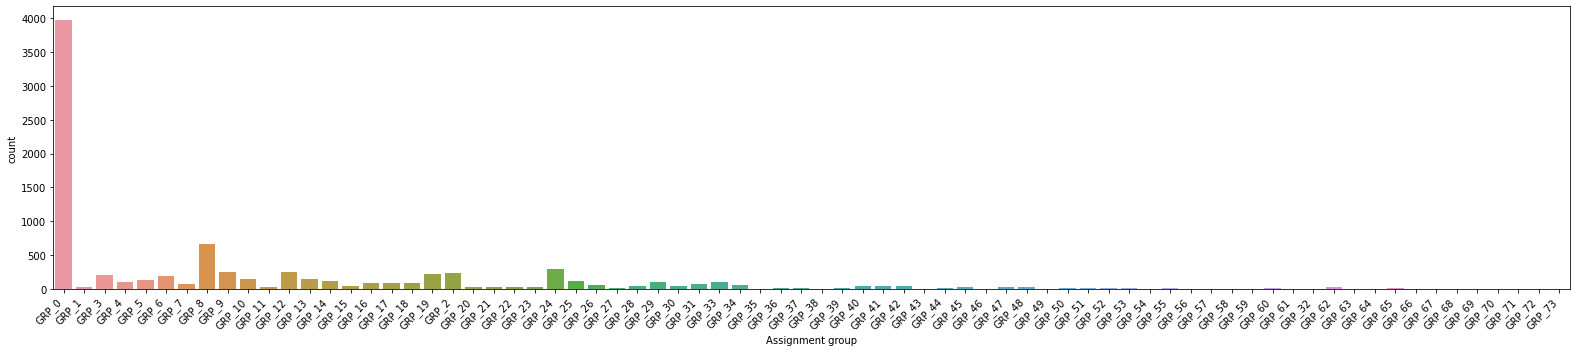

In [19]:
descending_order = data['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
ax=sns.countplot(x='Assignment group', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [20]:
data.dtypes

Short description    object
Description          object
Caller               object
Assignment group     object
final_description    object
dtype: object

In [21]:
data_grouped = data.groupby(['Assignment group'])
unique_group = data['Assignment group'].unique()
unique_group

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

Data points assigned to each group

In [22]:
group_count = {}
for group in unique_group:
  count = data[data['Assignment group']==group].shape[0]
  group_count[group] = count
group_count

{'GRP_0': 3976,
 'GRP_1': 31,
 'GRP_10': 140,
 'GRP_11': 30,
 'GRP_12': 257,
 'GRP_13': 145,
 'GRP_14': 118,
 'GRP_15': 39,
 'GRP_16': 85,
 'GRP_17': 81,
 'GRP_18': 88,
 'GRP_19': 215,
 'GRP_2': 241,
 'GRP_20': 36,
 'GRP_21': 29,
 'GRP_22': 31,
 'GRP_23': 25,
 'GRP_24': 289,
 'GRP_25': 116,
 'GRP_26': 56,
 'GRP_27': 18,
 'GRP_28': 44,
 'GRP_29': 97,
 'GRP_3': 200,
 'GRP_30': 39,
 'GRP_31': 69,
 'GRP_32': 4,
 'GRP_33': 107,
 'GRP_34': 62,
 'GRP_35': 1,
 'GRP_36': 15,
 'GRP_37': 16,
 'GRP_38': 3,
 'GRP_39': 19,
 'GRP_4': 100,
 'GRP_40': 45,
 'GRP_41': 40,
 'GRP_42': 37,
 'GRP_43': 5,
 'GRP_44': 15,
 'GRP_45': 35,
 'GRP_46': 6,
 'GRP_47': 27,
 'GRP_48': 25,
 'GRP_49': 6,
 'GRP_5': 129,
 'GRP_50': 14,
 'GRP_51': 8,
 'GRP_52': 9,
 'GRP_53': 11,
 'GRP_54': 2,
 'GRP_55': 8,
 'GRP_56': 3,
 'GRP_57': 2,
 'GRP_58': 3,
 'GRP_59': 6,
 'GRP_6': 184,
 'GRP_60': 20,
 'GRP_61': 1,
 'GRP_62': 25,
 'GRP_63': 3,
 'GRP_64': 1,
 'GRP_65': 11,
 'GRP_66': 4,
 'GRP_67': 1,
 'GRP_68': 3,
 'GRP_69': 2,
 'GRP_7'

Groups with less than 5 data points

In [23]:
smaller_group = []
for group in unique_group:
  count = data[data['Assignment group']==group].shape[0]
  if count<5:
    smaller_group.append(group)
    print('%s count is %d' %(group,count))

GRP_35 count is 1
GRP_38 count is 3
GRP_54 count is 2
GRP_56 count is 3
GRP_57 count is 2
GRP_58 count is 3
GRP_61 count is 1
GRP_32 count is 4
GRP_63 count is 3
GRP_64 count is 1
GRP_66 count is 4
GRP_67 count is 1
GRP_68 count is 3
GRP_69 count is 2
GRP_70 count is 1
GRP_71 count is 2
GRP_72 count is 2
GRP_73 count is 1


In [24]:
len(smaller_group)

18

In [25]:
#print(data[data['Assignment group']=='GRP_38']['final_description'])

In [26]:
#for grp in smaller_group:
#  print('Final_description of %s:' %(grp))
#  print(data[data['Assignment group']==grp]['final_description'])
  

Length of final description

In [27]:
data['len_final_Description'] = data['final_description'].apply(lambda x: len(x.split(" ")))
data.head()

,Short description,Description,Caller,Assignment group,final_description,len_final_Description
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,31
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,24
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...,14
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page,5
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,3


In [28]:
data['len_final_Description'].min()

1

In [29]:
data['len_final_Description'].max()

1431

Dropping columns which are of no use after modifications made above

In [30]:
data_updated = data.drop(['Short description', 'Description', 'Caller'], axis=1)
data_updated.head()

,Assignment group,final_description,len_final_Description
0,GRP_0,login issue -verified user details.(employee# ...,31
1,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,24
2,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...,14
3,GRP_0,unable to access hr_tool page,5
4,GRP_0,skype error,3


Text Preprocessing

In [31]:
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

Importing required libraries

In [32]:
import nltk
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from pickle import dump, load

In [33]:
## NLTK Downloads

nltk.download('stopwords')
stop = set(stopwords.words('english')) 
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [34]:
lemmatizer = WordNetLemmatizer()

In [35]:
#function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

In [36]:
def lemmatize_sentence(text):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(text))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

In [37]:
def clean_text(text, remove_stopwords=True):
  # Convert words to lower case
  text = text.lower()
  if True:
    text = text.split()
    new_text = []
    for word in text:
      if word in contractions:
        new_text.append(contractions[word])
      else:
        new_text.append(word)
      text = " ".join(new_text)
      text = re.sub(r"received from:",' ',text)
      text = re.sub(r"from:",' ',text)
      text = re.sub(r"to:",' ',text)
      text = re.sub(r"subject:",' ',text)
      text = re.sub(r"sent:",' ',text)
      text = re.sub(r"ic:",' ',text)
      text = re.sub(r"cc:",' ',text)
      text = re.sub(r"bcc:",' ',text)
      text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
      text = re.sub(r'\S+@\S+', ' ', text,re.I|re.A)
      text = re.sub(r'\<a href', ' ', text)
      text = re.sub(r'&amp;', '', text)
      text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
      text = re.sub(r'<br />', ' ', text)
      text = re.sub(r'\'', ' ', text)
      text = ' '.join(re.sub("[^\u0030-\u0039\u0041-\u005a\u0061-\u007a]", " ", text).split())
      text = lemmatize_sentence(text)

      if remove_stopwords:
        text = text.split()
        stops = set(stopwords.words("english"))
        stops.add('received')
        stops.add('hello')
        stops.add('team')
        stops.add('Thanks')
        stops.add('Regards')
        text = [w for w in text if not w in stops]
        text = " ".join(text)
  return text

Creating new column 'clean_description' after cleanup process

In [38]:
data_updated['clean_description'] = data_updated['final_description'].apply(clean_text)

In [39]:
data_updated.head()

,Assignment group,final_description,len_final_Description,clean_description
0,GRP_0,login issue -verified user details.(employee# ...,31,login issue verify user detail employee manage...
1,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,24,outlook meeting skype meeting etc appear outlo...
2,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...,14,cant log vpn hi log vpn best
3,GRP_0,unable to access hr_tool page,5,unable access hr tool page
4,GRP_0,skype error,3,skype error


In [40]:
data_updated['final_description'][1]

'outlook \r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind '

In [41]:
data_updated['clean_description'][1]

'outlook meeting skype meeting etc appear outlook calendar somebody please advise correct kind'

In [42]:
data_updated['len_clean_Description'] = data_updated['clean_description'].apply(lambda x: len(x.split(" ")))
data_updated.head()

,Assignment group,final_description,len_final_Description,clean_description,len_clean_Description
0,GRP_0,login issue -verified user details.(employee# ...,31,login issue verify user detail employee manage...,24
1,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,24,outlook meeting skype meeting etc appear outlo...,13
2,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...,14,cant log vpn hi log vpn best,7
3,GRP_0,unable to access hr_tool page,5,unable access hr tool page,5
4,GRP_0,skype error,3,skype error,2


In [43]:
data_updated['len_clean_Description'].min()

1

In [44]:
data_updated['len_clean_Description'].max()

1818

Using word cloud to have a overview of most frequent words

In [45]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline

stopwords = set(STOPWORDS)
## function to create Word Cloud
def show_wordcloud(data, title):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(15, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

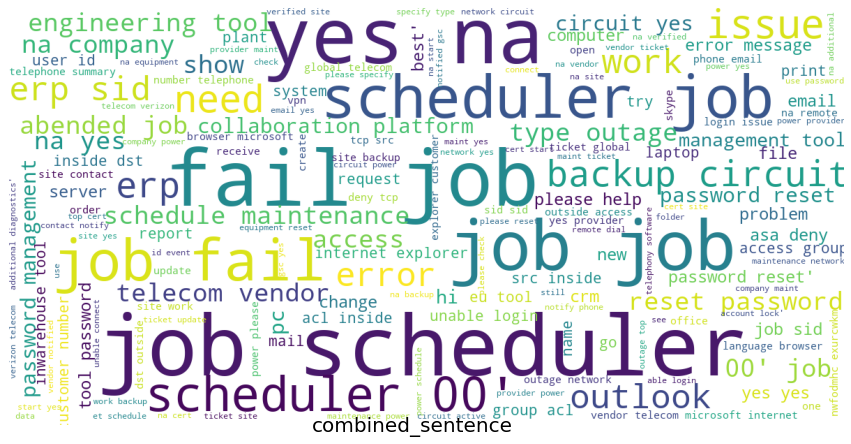

In [46]:
text_Str = data_updated['clean_description'].tolist()
show_wordcloud(text_Str,"combined_sentence")

Using Label Encoder for Target Variable

In [47]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data_updated['Assignment group'])
data_updated['Target'] = le.transform(data_updated['Assignment group'])
data_updated.head()

,Assignment group,final_description,len_final_Description,clean_description,len_clean_Description,Target
0,GRP_0,login issue -verified user details.(employee# ...,31,login issue verify user detail employee manage...,24,0
1,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,24,outlook meeting skype meeting etc appear outlo...,13,0
2,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...,14,cant log vpn hi log vpn best,7,0
3,GRP_0,unable to access hr_tool page,5,unable access hr tool page,5,0
4,GRP_0,skype error,3,skype error,2,0


Model 1: Tf-IFD vector with Multinomial Naive Bayes

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    data_updated['clean_description'].values, data_updated['Target'].values, 
    test_size=0.2, random_state=0)
print('Training utterances: {}'.format(X_train.shape[0]))
print('Validation utterances: {}'.format(X_test.shape[0]))

Training utterances: 6800
Validation utterances: 1700


In [50]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [51]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)
X_train, X_test

(<6800x16271 sparse matrix of type '<class 'numpy.float64'>'
 	with 109624 stored elements in Compressed Sparse Row format>,
 <1700x16271 sparse matrix of type '<class 'numpy.float64'>'
 	with 23788 stored elements in Compressed Sparse Row format>)

In [52]:
#Feature selection
from sklearn.feature_selection import SelectKBest, chi2

ch2 = SelectKBest(chi2, k=5000)
X_train = ch2.fit_transform(X_train, y_train)
X_test = ch2.transform(X_test)

X_train, X_test

(<6800x5000 sparse matrix of type '<class 'numpy.float64'>'
 	with 80394 stored elements in Compressed Sparse Row format>,
 <1700x5000 sparse matrix of type '<class 'numpy.float64'>'
 	with 18652 stored elements in Compressed Sparse Row format>)

In [53]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
clf = MultinomialNB()
clf.fit(X_train, y_train)
pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)
print(accuracy_score(y_train, pred_train))
print(accuracy_score(y_test, pred_test))

0.5598529411764706
0.58


Model 2: Glove Embedding with Bernoulli Naive Bayes

In [54]:
project_path = '/content/drive/My Drive/GL/Capstone_Project/'
glove_file = project_path + "glove.6B.zip"

In [55]:
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

In [56]:
EMBEDDING_FILE = './glove.6B.300d.txt'

embeddings_index = {}
f = open(EMBEDDING_FILE)
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [57]:
from nltk.tokenize import RegexpTokenizer

def description_to_words(comp):
    
    words = RegexpTokenizer('\w+').tokenize(comp)
    words = list(filter(lambda a: a != '', words))
    
    return words

In [58]:
#Taking average of all word embeddings in a sentence to generate the sentence representation.
data_list = list()
for comp in data_updated['clean_description']:
    sentence = np.zeros(300)
    count = 0
    for w in description_to_words(comp):
        try:
            sentence += embeddings_index[w]
            count += 1.0
        except KeyError:
            continue
    data_list.append(sentence)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(np.array(data_list), data_updated.Target.values, 
    test_size=2, random_state=0)

In [60]:
print(X_train.shape)
print(y_train.shape)

(8498, 300)
(8498,)


In [61]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
clf = BernoulliNB()
clf.fit(X_train, y_train)
pred_train = clf.predict(X_train)
print(accuracy_score(y_train, pred_train))


0.3849140974346905


Model 3: Glove embedding with simple LSTM model

In [62]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, CuDNNLSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D, LSTM
from keras.models import Model, Sequential

Using TensorFlow backend.


In [63]:
all_words = list()
for comp in data_updated['clean_description']:
    for w in comp.split(" "):
        all_words.append(w)

In [64]:
vocab = len(all_words)
vocab

217877

In [65]:
max_features = 18000
maxlen = 300 #Keeping 25 by considering the length of all the sentences
embedding_size = 300

In [66]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(data_updated['clean_description']))

In [67]:
X = tokenizer.texts_to_sequences(data_updated['clean_description'])
X = pad_sequences(X, maxlen = maxlen)

from keras.utils import to_categorical
y = to_categorical(data_updated['Target'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 8500
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   

In [68]:
vocab = tokenizer.word_index
vocab_size = len(vocab)
vocab_size

18478

In [69]:
project_path = '/content/drive/My Drive/GL/Capstone_Project/'
glove_file = project_path + "glove.6B.zip"

In [70]:
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

In [71]:
EMBEDDING_FILE = './glove.6B.300d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    #print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    #print(embd)
    embeddings[word] = embd

In [72]:
all_embs = np.stack(embeddings.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


In [73]:
nb_words = min(max_features, len(vocab))

embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embedding_size))
for word, i in tokenizer.word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

In [74]:
embedding_matrix

array([[ 0.26889467, -0.2625472 , -0.50029828, ..., -0.37667272,
        -0.74715477,  0.18698291],
       [-0.17794999,  0.45583001,  0.45181   , ...,  0.019476  ,
        -0.46919999,  0.30723   ],
       [-0.0084487 ,  0.28376001, -0.047303  , ..., -0.12586001,
        -0.52342999,  0.10208   ],
       ...,
       [ 0.40199   , -0.35014001,  0.21525   , ...,  0.13823999,
         0.53758001, -0.35442999],
       [ 0.45254001,  0.010768  ,  0.19691999, ..., -0.24604   ,
        -0.43650001,  0.028235  ],
       [ 0.1618    , -0.53452998,  0.31562001, ..., -0.38098001,
         0.0035621 ,  0.52710998]])

In [75]:
model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length = X.shape[1]))
model.add((LSTM(200, return_sequences = True)))
model.add(GlobalMaxPool1D())
model.add(Dense(74, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [76]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 300)          5400000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 300, 200)          400800    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 74)                14874     
Total params: 5,815,674
Trainable params: 5,815,674
Non-trainable params: 0
_________________________________________________________________


In [77]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 1) 

In [78]:
batch_size = 100
epochs = 5
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data = (x_test,y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 6800 samples, validate on 1700 samples
Epoch 1/5
6800/6800 [==============================] - 52s 8ms/step - loss: 2.7350 - accuracy: 0.4653 - val_loss: 2.5497 - val_accuracy: 0.4476
Epoch 2/5
6800/6800 [==============================] - 50s 7ms/step - loss: 2.3114 - accuracy: 0.5059 - val_loss: 2.1981 - val_accuracy: 0.5235
Epoch 3/5
6800/6800 [==============================] - 50s 7ms/step - loss: 1.9916 - accuracy: 0.5493 - val_loss: 2.0838 - val_accuracy: 0.5318
Epoch 4/5
6800/6800 [==============================] - 50s 7ms/step - loss: 1.7548 - accuracy: 0.5925 - val_loss: 1.8910 - val_accuracy: 0.5788
Epoch 5/5
6800/6800 [==============================] - 50s 7ms/step - loss: 1.5208 - accuracy: 0.6415 - val_loss: 1.7739 - val_accuracy: 0.5765


In [79]:
print("Accuracy of the model on Training Data is - " , model.evaluate(x_train,y_train)[1]*100)
print("Accuracy of the model on Testing Data is - " , model.evaluate(x_test,y_test)[1]*100)

6800/6800 [==============================] - 14s 2ms/step
Accuracy of the model on Training Data is -  66.14705920219421
1700/1700 [==============================] - 3s 2ms/step
Accuracy of the model on Testing Data is -  57.647061347961426


Model 4: Golve Embedding with Bidirection LSTM

In [80]:
model = Sequential()
model.add(Embedding(max_features, embedding_size, weights = [embedding_matrix]))
model.add(Bidirectional(LSTM(240, return_sequences = True)))
model.add(GlobalMaxPool1D())
#model.add(Dense(120, activation="relu"))
#model.add(Dropout(0.5))
model.add(Dense(74, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [81]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 300)         5400000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 480)         1038720   
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 480)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 74)                35594     
Total params: 6,474,314
Trainable params: 6,474,314
Non-trainable params: 0
_________________________________________________________________


In [82]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 1) 

In [83]:
batch_size = 100
epochs = 10
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data = (x_test,y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 6800 samples, validate on 1700 samples
Epoch 1/10
6800/6800 [==============================] - 106s 16ms/step - loss: 2.0745 - accuracy: 0.5491 - val_loss: 1.7466 - val_accuracy: 0.5912
Epoch 2/10
6800/6800 [==============================] - 105s 15ms/step - loss: 1.4444 - accuracy: 0.6435 - val_loss: 1.4367 - val_accuracy: 0.6353
Epoch 3/10
6800/6800 [==============================] - 104s 15ms/step - loss: 1.0999 - accuracy: 0.7181 - val_loss: 1.3152 - val_accuracy: 0.6735
Epoch 4/10
6800/6800 [==============================] - 107s 16ms/step - loss: 0.8443 - accuracy: 0.7787 - val_loss: 1.2458 - val_accuracy: 0.6741
Epoch 5/10
6800/6800 [==============================] - 105s 15ms/step - loss: 0.6212 - accuracy: 0.8425 - val_loss: 1.2096 - val_accuracy: 0.6912
Epoch 6/10
6800/6800 [==============================] - 105s 15ms/step - loss: 0.4502 - accuracy: 0.8866 - val_loss: 1.2592 - val_accuracy: 0.6871
Epoch 7/10
6800/6800 [==============================] - 108s 16ms/step

In [85]:
print("Accuracy of the model on Training Data is - " , model.evaluate(x_train,y_train)[1]*100)
print("Accuracy of the model on Testing Data is - " , model.evaluate(x_test,y_test)[1]*100)

6800/6800 [==============================] - 30s 4ms/step
Accuracy of the model on Training Data is -  97.73529171943665
1700/1700 [==============================] - 8s 4ms/step
Accuracy of the model on Testing Data is -  69.17647123336792
